In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.metrics as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

In [34]:
#funkcija 6.1.

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data


In [35]:
# 1. zadatak

np.random.seed(242)
dataTrain = generate_data(200)
np.random.seed(12)
dataTest = generate_data(100)

Text(0, 0.5, 'x2')

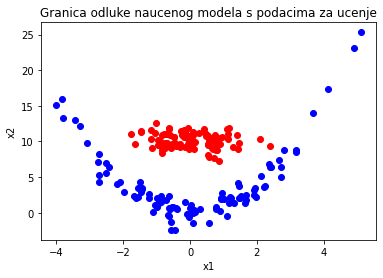

In [36]:
# 2. zadatak

plt.figure()
for i in range (0, len(dataTrain)):
    if(dataTrain[i, 2]) == 0:
        color="blue"
    else:
        color="red"
    plt.scatter(dataTrain[i, 0], dataTrain[i, 1], c = color)
    
plt.title('Granica odluke naucenog modela s podacima za ucenje')
plt.xlabel('x1')
plt.ylabel('x2')

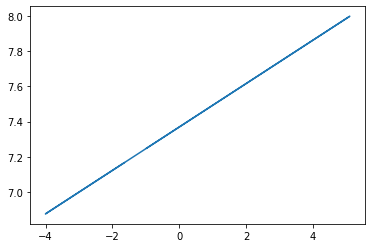

In [37]:
# 3. zadatak

model = lm.LogisticRegression()
model.fit(dataTrain[:, :-1], dataTrain[:, 2])

X2 = -(model.intercept_ + model.coef_[0, 0] * dataTrain[:, 0]) / model.coef_[0, 1]

plt.plot(dataTrain[:, 0], X2)

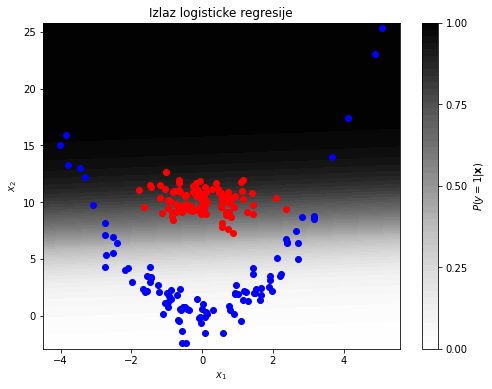

In [25]:
# 4. zadatak

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(dataTrain[:,0])-0.5:max(dataTrain[:,0])+0.5:.05,
 min(dataTrain[:,1])-0.5:max(dataTrain[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]

for i in range (0,len(dataTrain)):
    if(dataTrain[i,2]) == 0:
        color = "blue"
    else:
        color = "red"
    ax.scatter(dataTrain[i, 0], dataTrain[i, 1], c = color, zorder = 2)
    
probs = model.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

Text(0, 0.5, 'x2')

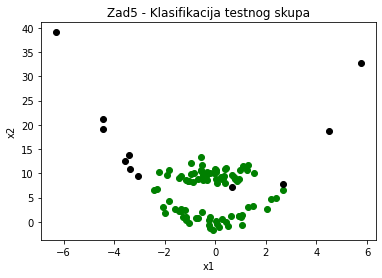

In [26]:
# 5. zadatak

y_predict = model.predict(dataTest[:, :-1])

plt.figure()
for i in range (0, len(dataTest)):
    if(dataTest[i, 2]) == y_predict[i]:
        color = "green" 
    else:
        color = "black" 
    plt.scatter(dataTest[i, 0], dataTest[i, 1], c = color)
plt.title('Zad5 - Klasifikacija testnog skupa')
plt.xlabel('x1')
plt.ylabel('x2')

In [27]:
#funkcija 6.3.

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in xrange(width):
        for y in xrange(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

In [ ]:
# 6. zadatak

matricaCm = sm.confusion_matrix(dataTest[:, 2], y_predict[:])
plot_confusion_matrix(matricaCm) 

TP = float(matricaCm[0, 0])
TN = float(matricaCm[1, 1]) 
FP = float(matricaCm[0, 1])
FN = float(matricaCm[1, 0])


accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
missclasificationRate = (1 - accuracy) * 100
precision = TP / (TP + FP) * 100
sensitivity = TP / (TP + FN) * 100
specificity = TN / (TN + FP) * 100

In [29]:
#funkcija 6.4.

def plot_KNN(KNN_model, X, y):
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                         np.arange(x2_min, x2_max, 0.01))
         
    Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z1.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
    plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu',  edgecolor='white', label = 'train')


NameError: ignored

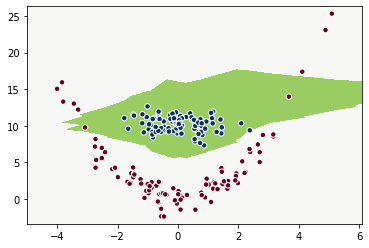

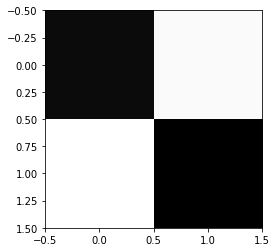

In [30]:
# 8. zadatak

modelknn = KNeighborsClassifier(n_neighbors = 5)
modelknn.fit(dataTrain[:, :-1], dataTrain[:, 2])

plot_KNN(modelknn, dataTrain[:, :-1], dataTrain[:, 2])

y_predict1 = modelknn.predict(dataTest[:, :-1])
matricaCm1 = sm.confusion_matrix(dataTest[:,2], y_predict1[:])
plot_confusion_matrix(matricaCm1)